<a href="https://colab.research.google.com/github/PreethaBansi/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Title:-**
##**Online Retail Customer Segmentation**

##**Project Type :- Unsupervised Machine Learning**

##**Contribution:- Individual**

##**Project Summary:-**

##The Online Retail Customer Segmentation is very useful and relatable now in times where online businesses are more sought after. The business goals of each online business is different and requires a variety of data to attain it's goal.

##This dataset has more than half a million entries with 8 attributes. Each attribute has it's own use in the business.

##The Exploratory Data Analysis(EDA) of this dataset helped visualise the variety of customers using Online Retail facilities. For example, the EDA process helps the Businesses understand the Month and Day in which a huge number of online retail takes place.

##The Online Retail Customer Segmentation is mainly based on the montary value a customer can bring to the business through purchasing online. Therefore, the RFM model - Regency,Frequency and Monetary value Model is used here.

##The RFM model is followed by K Means Clustering and Hierarchial Clustering Models to determine the most probable segments a customer can be put in by the businesses conducting Online Retail.

##**GitHub Link :-**
https://github.com/PreethaBansi/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb

##**Problem Statement - Business Context:-**
##In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

##**1. Importing Libraries**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings("ignore")



##**2. Mounting and Loading the Dataset**

In [ ]:
# Mounting and loading the dataset
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

##**3. Understanding the Dataset**

In [ ]:
# Dataset rows and columns
df.shape

(541909, 8)

##The dataset originally contains :-
##> No of Rows = 541909
##> No of Columns = 8




In [ ]:
# Dataset first look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Dataset first look
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Stating the columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Dataset descriptive summary
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [ ]:
# Dataset duplicates
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
# Dataset duplicate value count
df.duplicated().sum()

5268

##The dataset 'Online Retail Customer Segmentation' has 5268 duplicates.

In [ ]:
# Dropping duplicates from the dataset
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
df.shape

(406829, 8)

##After removing the duplicates from the dataset, the number of rows have reduced, while the number of columns remain the same.
##No of Rows = 406829
##No of Columns = 8

In [ ]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [ ]:
# Changing the datatype of "CustomerID" to string
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
# Changing the datatype of "InvoiceNo" to string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

##**3. Exploratory Data Analysis (EDA)**

##1. Distribution of Online Retail Customers by Country.

Text(0, 0.5, 'Count')

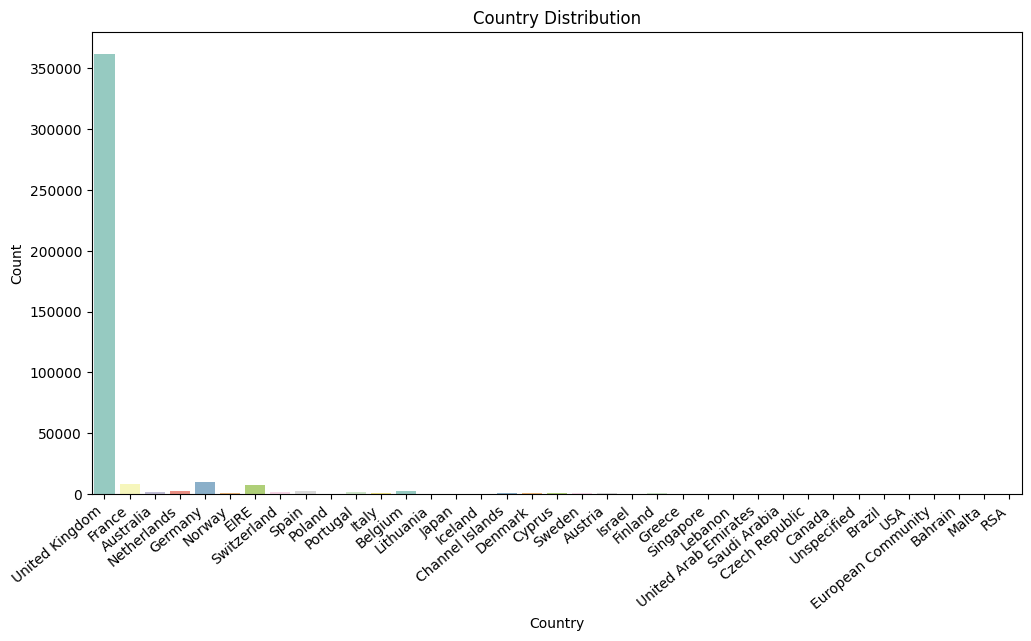

In [ ]:
# Country Distribution
plt.figure(figsize=(12,6))
sns.countplot(x = df['Country'],palette= 'Set3')
plt.xticks(rotation=40,ha='right')
plt.title("Country Distribution")
plt.xlabel('Country')
plt.ylabel('Count')

##Inference
##United Kingdom(UK) has the highest number of customers using online retail services, compared to other countries that use online retail in negligible ways.

##2. Distribution of Online Retail by Year.

Text(0, 0.5, 'Count')

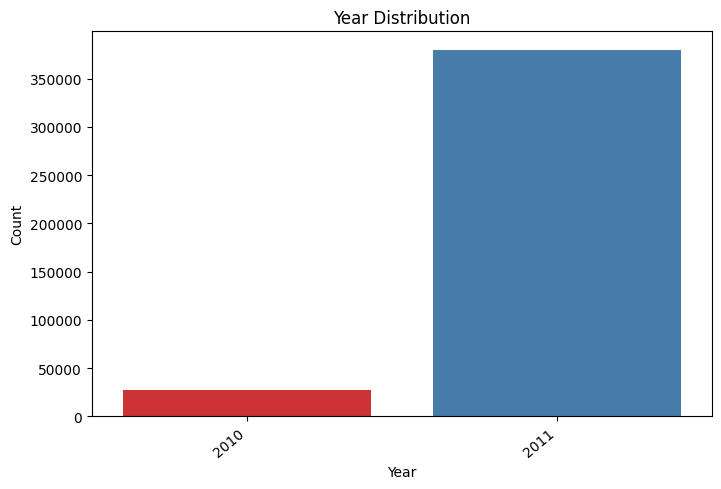

In [ ]:
# Yearwise Distribution
plt.figure(figsize=(8,5))
sns.countplot(x = df['InvoiceDate'].dt.year,palette= 'Set1')
plt.xticks(rotation=40,ha='right')
plt.title("Year Distribution")
plt.xlabel('Year')
plt.ylabel('Count')

##Inference
##The year 2011 has seen a tremendous leap in the usage of Online Retail services as compared to it's previous year.

##3. Distribution of Online Retail by Months.

Text(0, 0.5, 'Count')

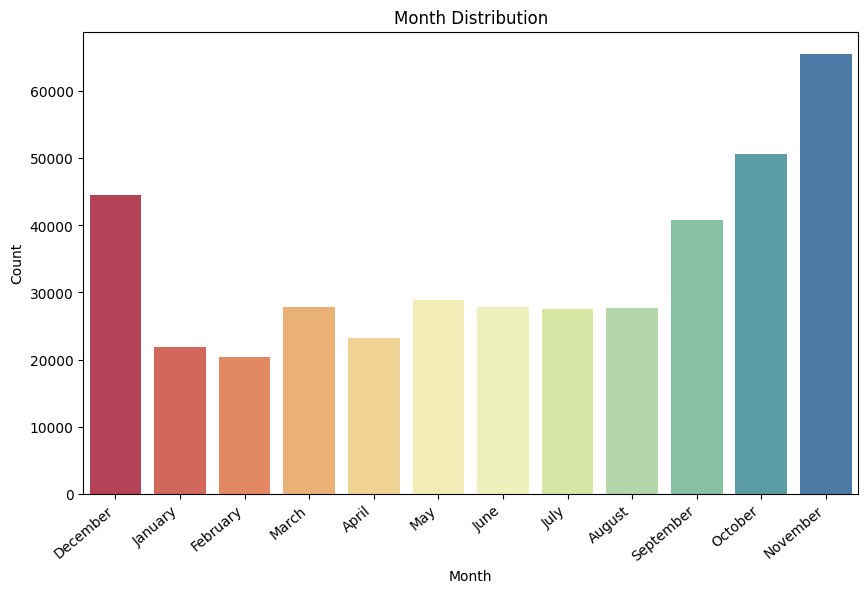

In [ ]:
# Month Distribution
plt.figure(figsize=(10,6))
sns.countplot(x = df['InvoiceDate'].dt.month_name(),palette= 'Spectral')
plt.xticks(rotation=40,ha='right')
plt.title("Month Distribution")
plt.xlabel('Month')
plt.ylabel('Count')

##Inference
##The usage of Online Retail is highest in the month of November followed closely by October and December.
##The month February has the least amount of sales by Online Retail.

##4. Distribution of Online Retail by days of the week.

Text(0, 0.5, 'Count')

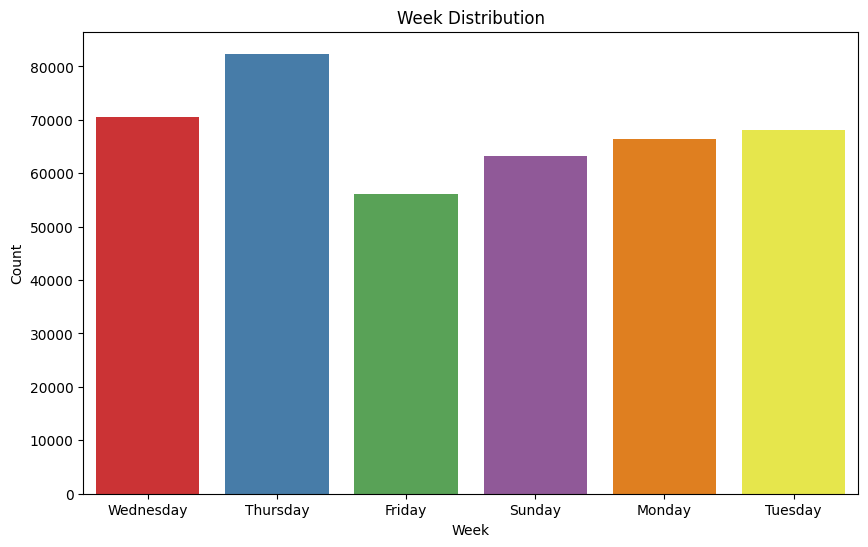

In [ ]:
# Week Distribution
plt.figure(figsize=(10,6))
sns.countplot(x = df['InvoiceDate'].dt.day_name(),palette= 'Set1')
plt.title("Week Distribution")
plt.xlabel('Week')
plt.ylabel('Count')

##Inference
##The dataset states that Thursdays is the most popular day in Online Retail, closely followed by Tuesdays and Wednesdays.

##5. Top 5 products in Online Retail.

In [ ]:
# Stating the Top 5 products in Online Retail
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416


<Axes: title={'center': 'Top 5 Product Name'}, xlabel='Description_Name', ylabel='Count'>

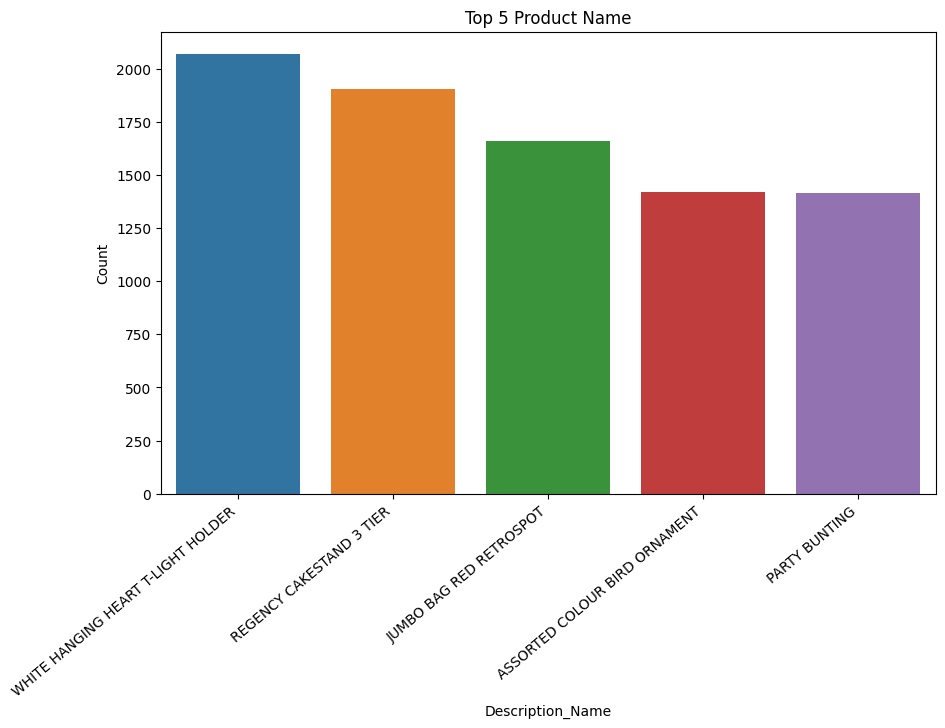

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=40,ha='right')
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

##Inference
##The Top 5 products in Online Retail are:-
##> White Hanging Heart T-Light Holder
##> Regency Cakestand 3 Tier
##> Jumbo Bar Red Retrospot
##> Assorted Colour Bird Ornament
##> Party Bunting

##6. Bottom 5 products in Online Retail.

In [ ]:
# Stating the Bottom 5 products in Online Retail
Description_df.tail()

,Description_Name,Count
3891,ANTIQUE RASPBERRY FLOWER EARRINGS,1
3892,"WALL ART,ONLY ONE PERSON",1
3893,GOLD/AMBER DROP EARRINGS W LEAF,1
3894,INCENSE BAZAAR PEACH,1
3895,PINK BAROQUE FLOCK CANDLE HOLDER,1


<Axes: title={'center': 'Bottom 5 product Name'}, xlabel='Description_Name', ylabel='Count'>

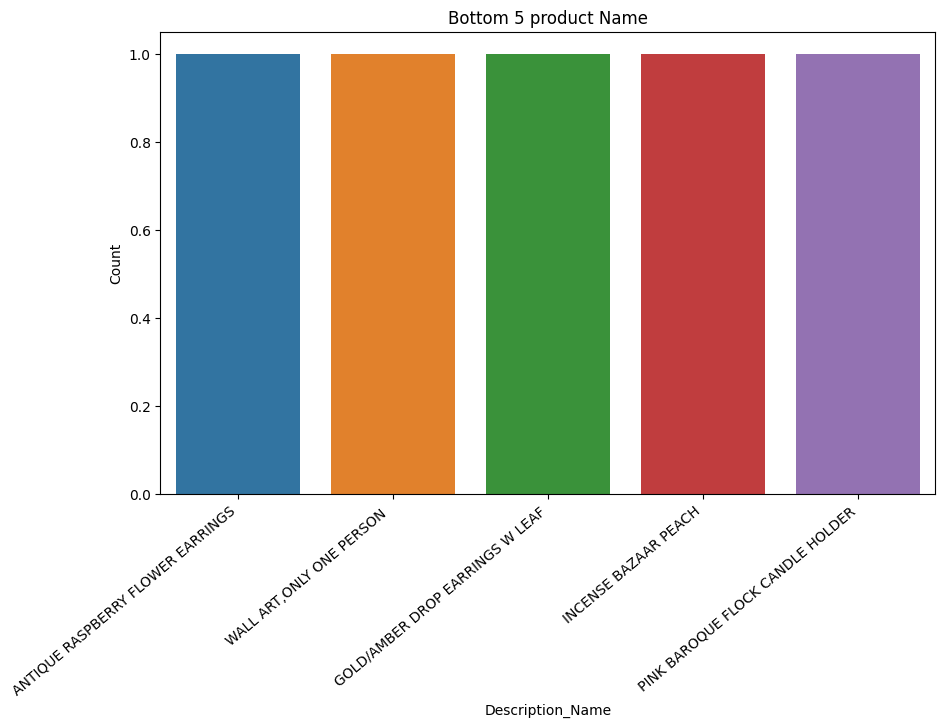

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=40,ha='right')
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

##Inference
##The Bottom 5 products in Online Retail are:-
##> Antique Raspberry Flower Earings
##> Wall Art
##Gold/Amber Drop Earrings W Leaf
##> Incense Bazaar Peach
##> Pink Baroque Flock Candle Holder

##These products have each been sold only once by the duration of 2 years in this dataset.

##7. Countries that order through Online Retail

<Axes: >

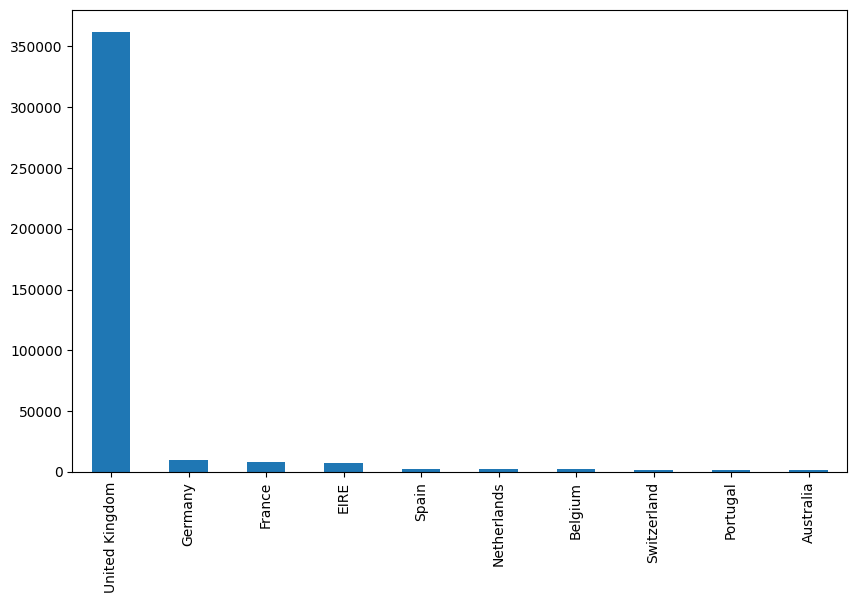

In [ ]:
# Barplot of Country
df.Country.value_counts().head(10).plot.bar(figsize=(10,6))

##Inference
##Countries that order the most through Online Retail is fairly closely related to customers purchasing through Online Retail.
##United Kingdom has the highest number of orders placed in Online Retail.

##8. Unique Customers.

In [ ]:
len(df.CustomerID.unique())

4372

##Inference
##There are 4373 unique customer records in the dataset.

##9. Unique Items in Stock

In [ ]:
# Number of unique items in stock
print(f"Number of unique item stock codes: {len(df.StockCode.unique())}")
print(f"Number of unique item descriptions: {len(df.Description.unique())}")

Number of unique item stock codes: 3684
Number of unique item descriptions: 3896


##Inference
##The count of unique stock unit ids and their descriptions should have matched but they do not. This implies some stock units might have more than one descriptions.

##10. Distribution of Amount.

In [ ]:
# Creating new feature called the Total Amount
df['TotalAmount']=df['Quantity']*df['UnitPrice']

<Axes: title={'center': 'Distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

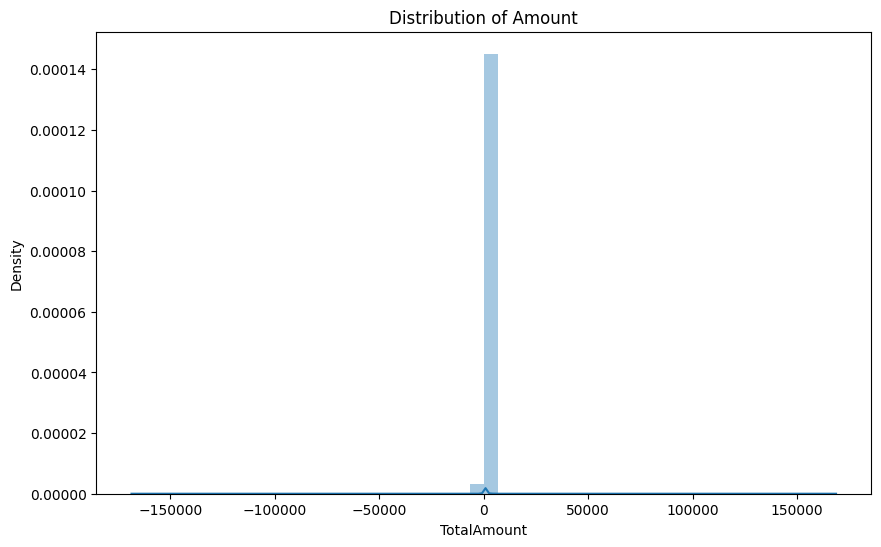

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Amount')
colors=["B"]
sns.distplot(df['TotalAmount'])

In [ ]:
df['TotalAmount'].describe()

count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: TotalAmount, dtype: float64

<Axes: >

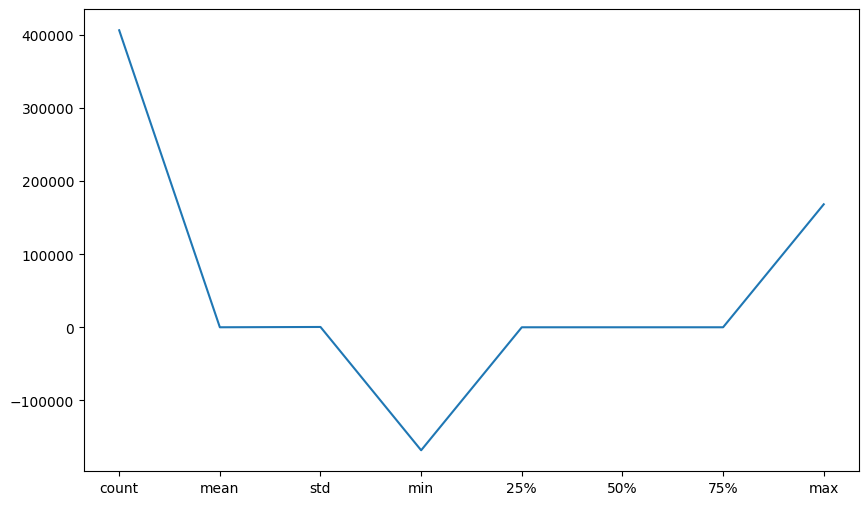

In [ ]:
plt.figure(figsize=(10,6))
df['TotalAmount'].describe().plot()

##Inference
##The line graph above shows that the Mean and the Standard amount are equal.

##**RFM Model(Regency, Frequency Monetary Value)**
##The regency frequency and monetary values model is a marketing tool used to identify a company's/ organisation's best customers through certain measures.
##The customers are evaluated with respect to 3 factors:-

##> R (Recency): Number of days since last purchase.

##> F (Frequency): Number of transactions.

##> M (Monetary): Total Amount of transactions (revenue contributed).

In [ ]:
# Creating a New Attribute : Monetary
rfm_m = df.groupby('CustomerID')['TotalAmount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,TotalAmount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# Creating a New Attribute : Frequency
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
#inner: use intersection of keys from both frames, similar to a SQL innerjoin; preserve the order of the left keys
rfm.head()

,CustomerID,TotalAmount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# Creating a New Attribute : Recency
# Convert to datetime to proper datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
# Compute the maximum date to know the last transaction date
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Compute the difference between max date and transaction date
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
# Compute last transaction date to get the recency of customers
rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
# Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<Axes: xlabel='Recency', ylabel='Density'>

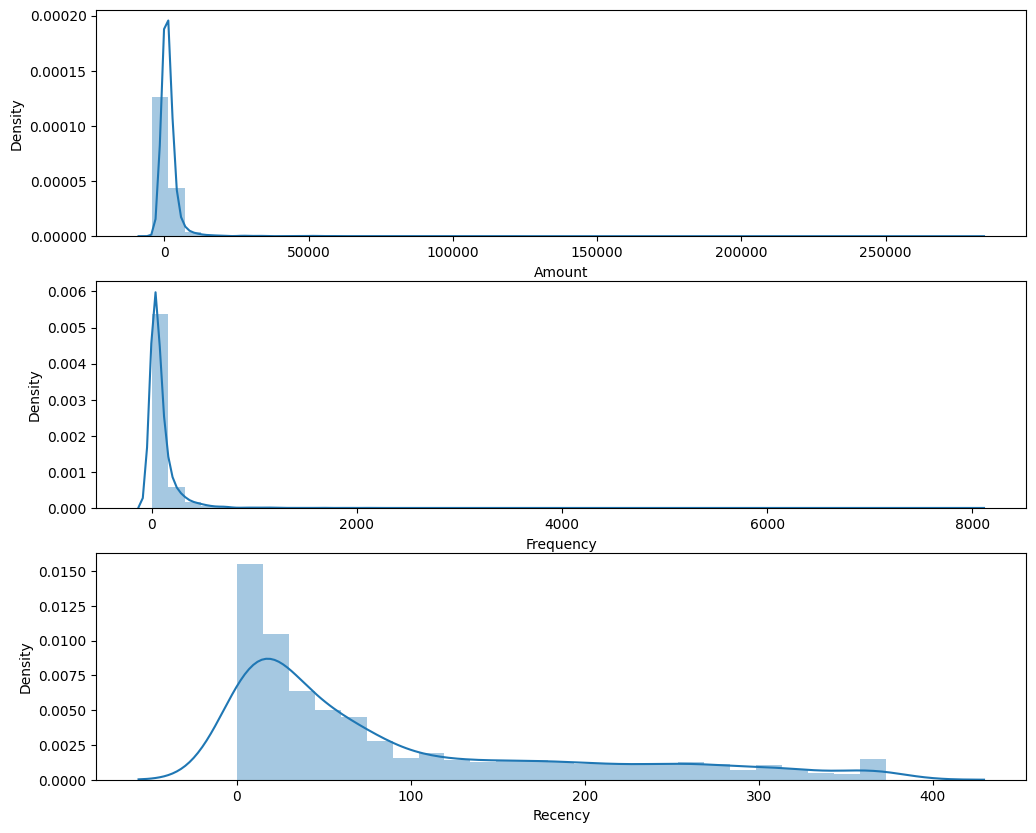

In [ ]:
# Checking the distribution of Recency, Frequency and Monetary Value variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm['Amount'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm['Recency'])

##Inference
##From the above graphs, we can conclude that all the variables have an asymmetrical distribution.
##These factors are skewed to the right.

##Outlier Analysis

Text(0.5, 0, 'Attributes')

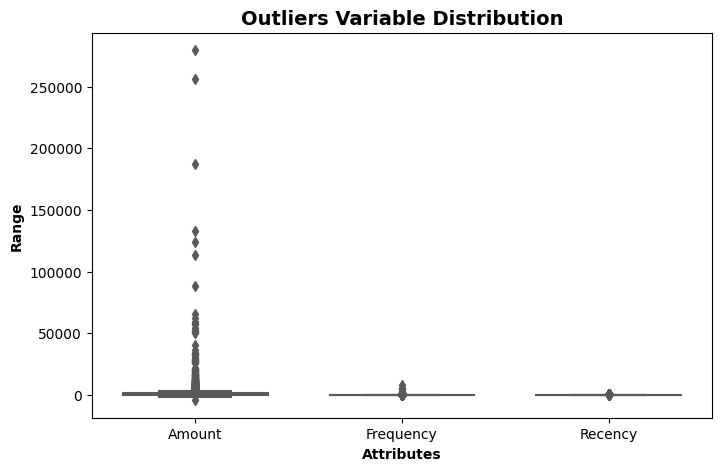

In [ ]:
# Outlier Analysis of Amount Frequency and Recency
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

##The range of Amount is the attribute with the most outliers present in the dataset.

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

##Rescaling the attributes using Standardization Scaling(Mean=0,Sigma=1).

In [ ]:
# Rescaling the attributes
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


##**Building the Model**

##K-Means Clustering

In [ ]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([2, 3, 1, ..., 2, 1, 1], dtype=int32)

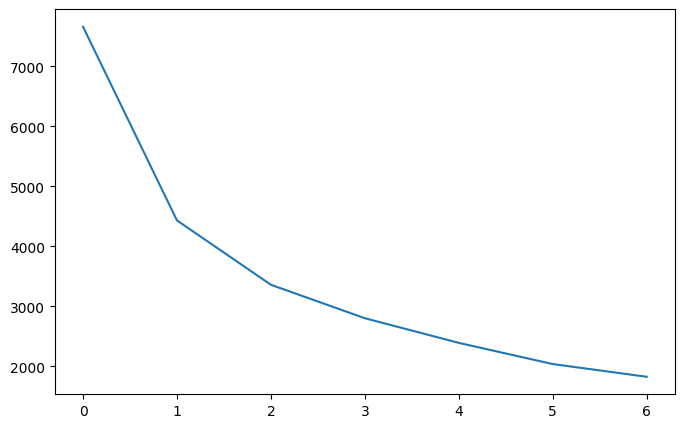

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

## Determining the optimal number of clusters into which the data may be clustered is an important part of any unsupervised algorithm. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.48148099614734263
For n_clusters=5, the silhouette score is 0.46627005641897035
For n_clusters=6, the silhouette score is 0.41758431193450735
For n_clusters=7, the silhouette score is 0.4176350565197656
For n_clusters=8, the silhouette score is 0.40882897186862865


##The Silhoutte Score ranges between -1 and 1.
##A score closer to 1 indicates that the data point is very similar to other data points in the cluster.
##A score closer to -1 indicates that the data point is not similar to the data points in its cluster

In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
# Assigning the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

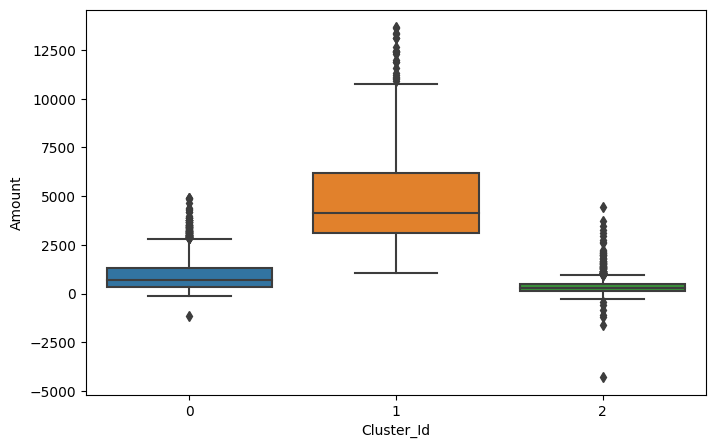

In [ ]:
# Using Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

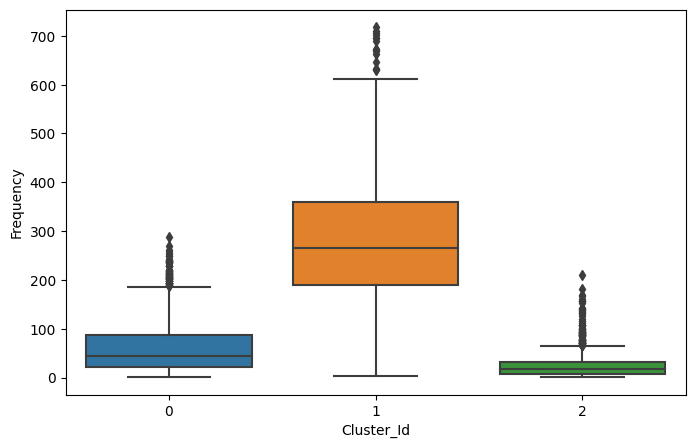

In [ ]:
# Using Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

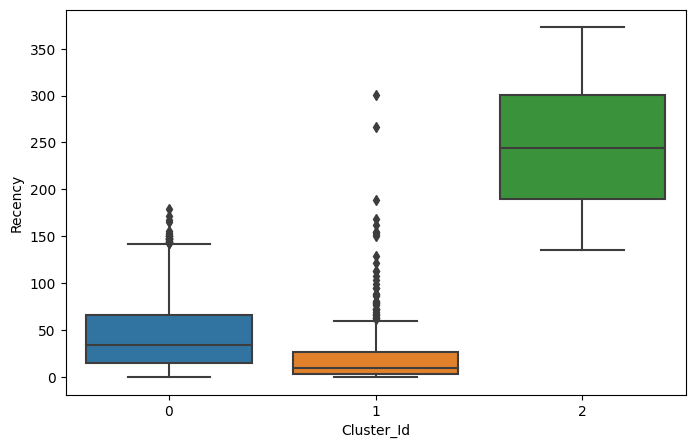

In [ ]:
# Using Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

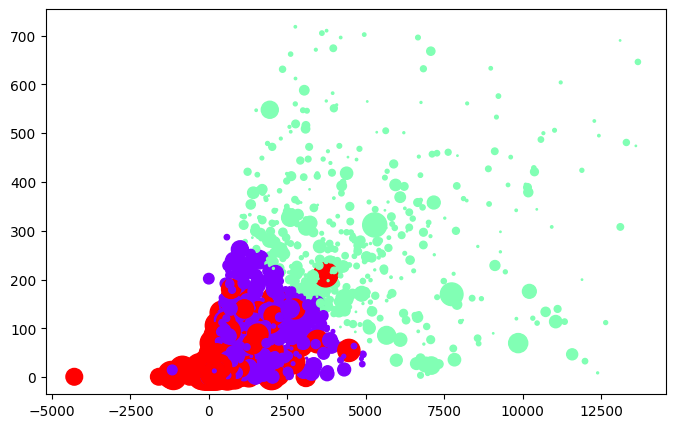

In [ ]:
# Using Scatter plot for Amount,Frequency and Recency
plt.scatter(rfm['Amount'],rfm['Frequency'],rfm['Recency'],
                     c=kmeans.labels_, cmap='rainbow');

##Hierarchial Clustering

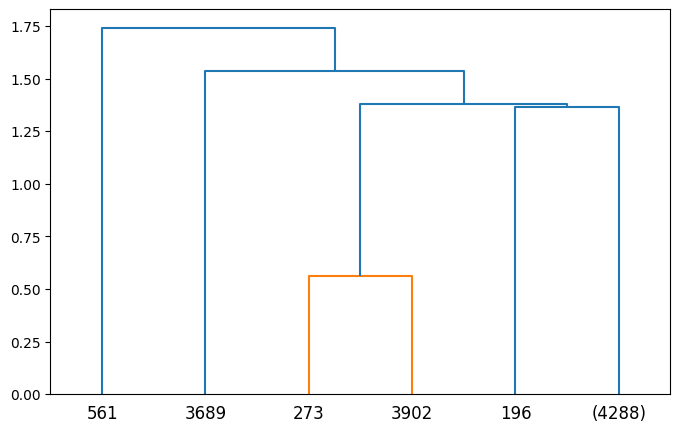

In [ ]:
# Single linkage:
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings, truncate_mode='level', p=3)
plt.show()

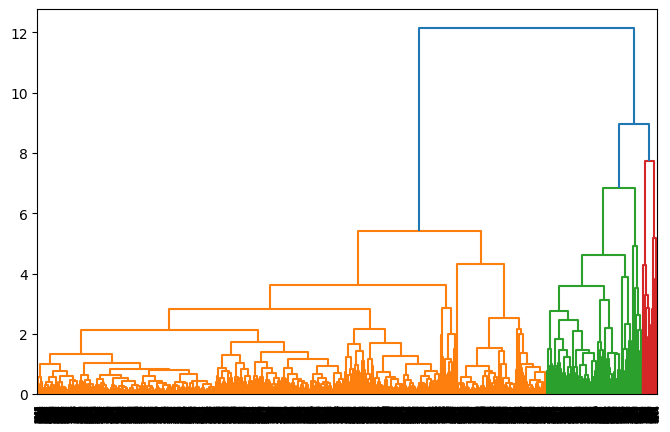

In [ ]:
# Complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

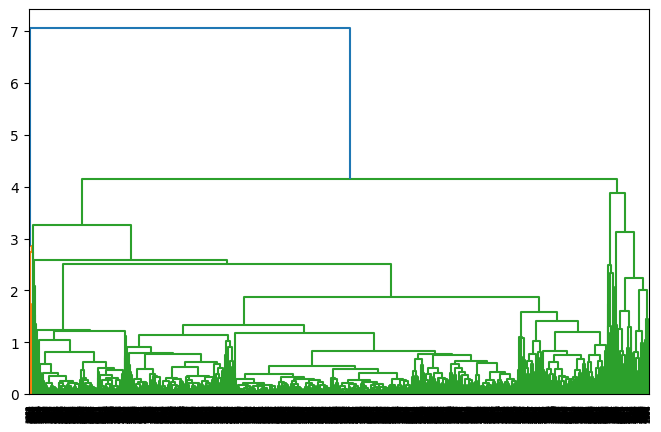

In [ ]:
# Average linkage
mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# Cutting the Dendrogram based on k
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Assign cluster labels
rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,0
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


<Axes: xlabel='Cluster_Labels', ylabel='Amount'>

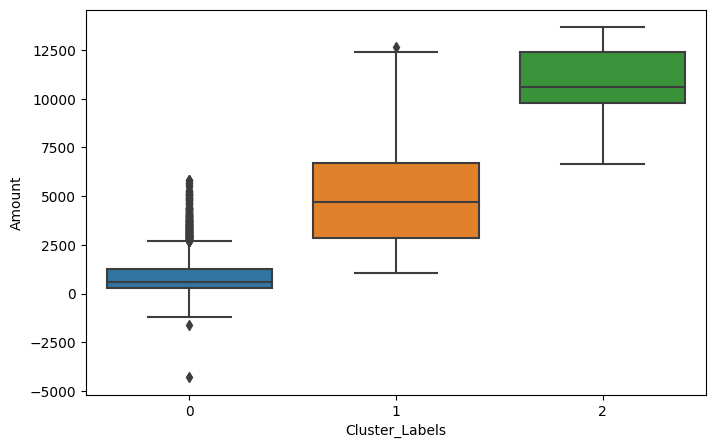

In [ ]:
# Plotting Cluster Id vs Amount
sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Labels', ylabel='Frequency'>

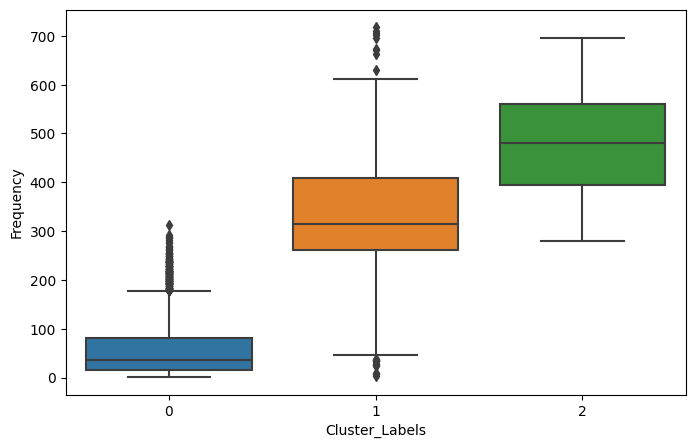

In [ ]:
# Plotting Cluster Id vs Frequency
sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Labels', ylabel='Recency'>

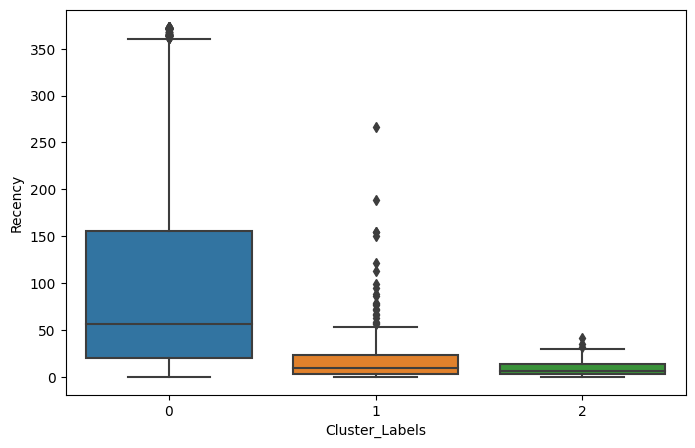

In [ ]:
# Plotting Cluster Id vs Recency
sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

##**Conclusion**

##The Online Retail Customer Segmentation dataset has 8 attributes that have been useful to determine and successfully segment customers using 2 main Clustering models as follows:-

##K-Means Clustering with 3 Cluster Ids:-

##> Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.

##> Customers with Cluster Id 2 are frequent buyers.

##> Customers with Cluster Id 1 are not recent buyers and hence least of importance from business point of view.

##Hierarchical Clustering with 3 Cluster Labels:-

##> Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.

##> Customers with Cluster_Labels 2 are frequent buyers.

##> Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

##From the above inferences the Online Businesses can segment their customers and provide and implement appropriate techniques to increase their retail sales and attain their Business goals.

##**THANK YOU!!**